In [59]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns
import plotly 
import plotly.express as px

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, confusion_matrix

from sklearn.tree import DecisionTreeClassifier

In [9]:
case1 = pd.read_csv('/Users/ashnadua/Desktop/cases10to13.csv')
case2 = pd.read_csv('/Users/ashnadua/Desktop/df2014.csv')
case3 = pd.read_csv('/Users/ashnadua/Desktop/df2015.csv')
case4 = pd.read_csv('/Users/ashnadua/Desktop/df2016.csv')
case5 = pd.read_csv('/Users/ashnadua/Desktop/df2017.csv')
case6 = pd.read_csv('/Users/ashnadua/Desktop/df2018.csv')

In [10]:
case1 = case1.drop(['Unnamed: 0'], axis=1)
case2 = case2.drop(['Unnamed: 0'], axis=1)
case3 = case3.drop(['Unnamed: 0'], axis=1)
case4 = case4.drop(['Unnamed: 0'], axis=1)
case5 = case5.drop(['Unnamed: 0'], axis=1)
case6 = case6.drop(['Unnamed: 0'], axis=1)

In [11]:
data = pd.concat([case1, case2], ignore_index=True)
data = pd.concat([data, case3], ignore_index=True)
data = pd.concat([data, case4], ignore_index=True)
data = pd.concat([data, case5], ignore_index=True)
data = pd.concat([data, case6], ignore_index=True)

In [14]:
data = data.drop(['date_next_list', 'criminal'], axis=1)

In [15]:
data.head()

,type_name,purpose_name,disp_name,act,section,bailable_ipc
0,co-op.appeal,filling of written statement,abated,17353.0,1129211.0,not applicable to section
1,matrimonial old,formal hearing (10:00 am ...,disposed,17353.0,1140567.0,bailable
2,matrimonial old,ex_party hearing (11:00 am ...,fine,17353.0,965693.0,non-bailable
3,matrimonial old,filing of requisites app. of defendent.,converted,17353.0,847459.0,bailable
4,matrimonial old,filing of requisites app. of defendent.,acquitted,17353.0,1129211.0,not applicable to section


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15004369 entries, 0 to 15004368
Data columns (total 6 columns):
 #   Column        Dtype  
---  ------        -----  
 0   type_name     object 
 1   purpose_name  object 
 2   disp_name     object 
 3   act           float64
 4   section       float64
 5   bailable_ipc  object 
dtypes: float64(2), object(4)
memory usage: 686.8+ MB


In [17]:
y = data.bailable_ipc.values

x = data.drop(['bailable_ipc'], axis=1)

In [18]:
x.head()

,type_name,purpose_name,disp_name,act,section
0,co-op.appeal,filling of written statement,abated,17353.0,1129211.0
1,matrimonial old,formal hearing (10:00 am ...,disposed,17353.0,1140567.0
2,matrimonial old,ex_party hearing (11:00 am ...,fine,17353.0,965693.0
3,matrimonial old,filing of requisites app. of defendent.,converted,17353.0,847459.0
4,matrimonial old,filing of requisites app. of defendent.,acquitted,17353.0,1129211.0


In [19]:
x.shape

(15004369, 5)

In [20]:
x.isnull().sum()

type_name            0
purpose_name    358486
disp_name            0
act                  0
section              0
dtype: int64

In [21]:
x.dropna(subset=['purpose_name'], inplace=True)

In [22]:
x.isnull().sum()

type_name       0
purpose_name    0
disp_name       0
act             0
section         0
dtype: int64

In [23]:
objects = [col for col in x.columns if x[col].dtype==object]
objects

['type_name', 'purpose_name', 'disp_name']

In [24]:
numeric = list(set(x.columns) - set(objects))
numeric

['section', 'act']

In [25]:
encoder = LabelEncoder()
caseData = data.copy()
caseData['type_name_transformed'] = encoder.fit_transform(data['type_name'])
caseData['disp_name_transformed'] = encoder.fit_transform(data['disp_name'])
caseData['purpose_name_transformed'] = encoder.fit_transform(data['purpose_name'])
caseData['bailable_ipc_transformed'] = encoder.fit_transform(data['bailable_ipc'])

In [26]:
caseData.head()

,type_name,purpose_name,disp_name,act,section,bailable_ipc,type_name_transformed,disp_name_transformed,purpose_name_transformed,bailable_ipc_transformed
0,co-op.appeal,filling of written statement,abated,17353.0,1129211.0,not applicable to section,1002,1,3348,3
1,matrimonial old,formal hearing (10:00 am ...,disposed,17353.0,1140567.0,bailable,3299,24,4187,0
2,matrimonial old,ex_party hearing (11:00 am ...,fine,17353.0,965693.0,non-bailable,3299,29,2927,2
3,matrimonial old,filing of requisites app. of defendent.,converted,17353.0,847459.0,bailable,3299,18,3195,0
4,matrimonial old,filing of requisites app. of defendent.,acquitted,17353.0,1129211.0,not applicable to section,3299,3,3195,3


In [27]:
trainingData = caseData.drop(['type_name', 'disp_name', 'purpose_name', 'bailable_ipc'], axis= 1)
trainingData.head()

,act,section,type_name_transformed,disp_name_transformed,purpose_name_transformed,bailable_ipc_transformed
0,17353.0,1129211.0,1002,1,3348,3
1,17353.0,1140567.0,3299,24,4187,0
2,17353.0,965693.0,3299,29,2927,2
3,17353.0,847459.0,3299,18,3195,0
4,17353.0,1129211.0,3299,3,3195,3


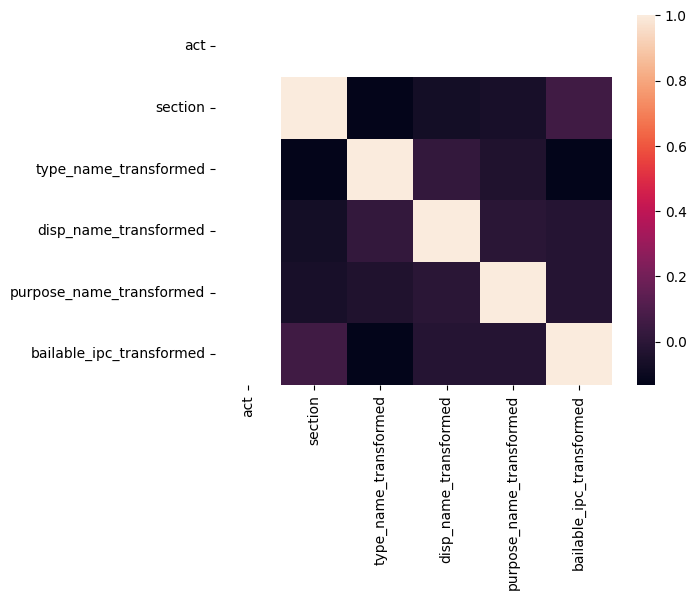

In [30]:
corr = caseData.corr(numeric_only = [False])
fig = sns.heatmap(corr)
fig.figure.savefig("heatmap.png")

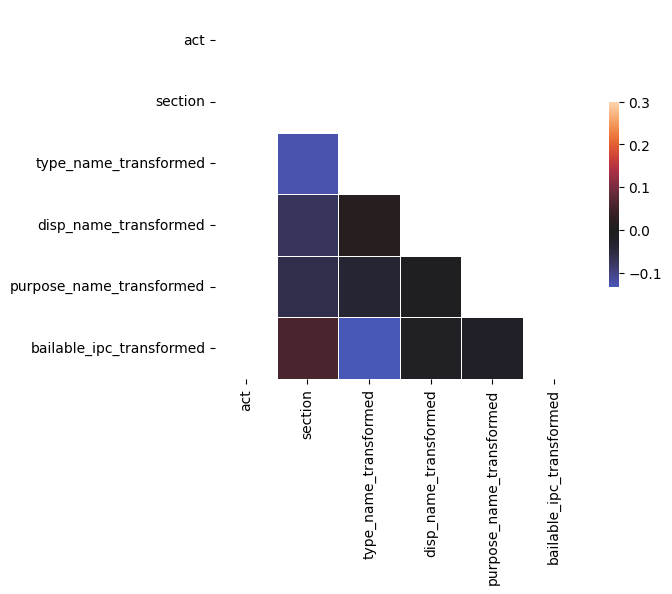

In [32]:
mask = np.triu(np.ones_like(corr, dtype=bool))
fig = sns.heatmap(corr, mask=mask, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
fig.figure.savefig("heatmap2.png")

In [34]:
X = caseData.drop(['type_name', 'purpose_name', 'disp_name', 'bailable_ipc', 'bailable_ipc_transformed'], axis=1)

Y = caseData['bailable_ipc']

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=101)

In [39]:
#Decision Tree Classifier
decisionTreeClassifier_model = DecisionTreeClassifier()
decisionTreeClassifier_model.fit(X_train,Y_train)
predict = decisionTreeClassifier_model.predict(X_test)

print(classification_report(Y_test,predict))

                           precision    recall  f1-score   support

                 bailable       1.00      1.00      1.00   2388513
                  depends       1.00      1.00      1.00    147416
             non-bailable       1.00      1.00      1.00   1786802
not applicable to section       1.00      1.00      1.00    172870
   unclear, need to check       1.00      1.00      1.00      5710

                 accuracy                           1.00   4501311
                macro avg       1.00      1.00      1.00   4501311
             weighted avg       1.00      1.00      1.00   4501311



In [66]:
score = decisionTreeClassifier_model.score(X_test, Y_test)

In [67]:
score

0.999998667054998

In [50]:
decisionTreeClassifier_model.feature_importances_

array([0.00000000e+00, 9.98864805e-01, 4.82389794e-04, 6.51171779e-04,
       1.63318130e-06])

In [41]:
from sklearn import tree
text_representation = tree.export_text(decisionTreeClassifier_model)
print(text_representation)

|--- feature_1 <= 1134431.00
|   |--- feature_1 <= 932564.50
|   |   |--- feature_1 <= 692074.50
|   |   |   |--- feature_1 <= 207773.50
|   |   |   |   |--- feature_1 <= 121798.50
|   |   |   |   |   |--- feature_1 <= 111953.50
|   |   |   |   |   |   |--- feature_1 <= 88761.00
|   |   |   |   |   |   |   |--- feature_1 <= 61186.50
|   |   |   |   |   |   |   |   |--- class: not applicable to section
|   |   |   |   |   |   |   |--- feature_1 >  61186.50
|   |   |   |   |   |   |   |   |--- feature_1 <= 68946.00
|   |   |   |   |   |   |   |   |   |--- feature_1 <= 62980.50
|   |   |   |   |   |   |   |   |   |   |--- class: depends
|   |   |   |   |   |   |   |   |   |--- feature_1 >  62980.50
|   |   |   |   |   |   |   |   |   |   |--- class: not applicable to section
|   |   |   |   |   |   |   |   |--- feature_1 >  68946.00
|   |   |   |   |   |   |   |   |   |--- feature_1 <= 81826.50
|   |   |   |   |   |   |   |   |   |   |--- feature_1 <= 76150.50
|   |   |   |   |   |   |   

In [48]:
trainingData.head()

,act,section,type_name_transformed,disp_name_transformed,purpose_name_transformed,bailable_ipc_transformed
0,17353.0,1129211.0,1002,1,3348,3
1,17353.0,1140567.0,3299,24,4187,0
2,17353.0,965693.0,3299,29,2927,2
3,17353.0,847459.0,3299,18,3195,0
4,17353.0,1129211.0,3299,3,3195,3


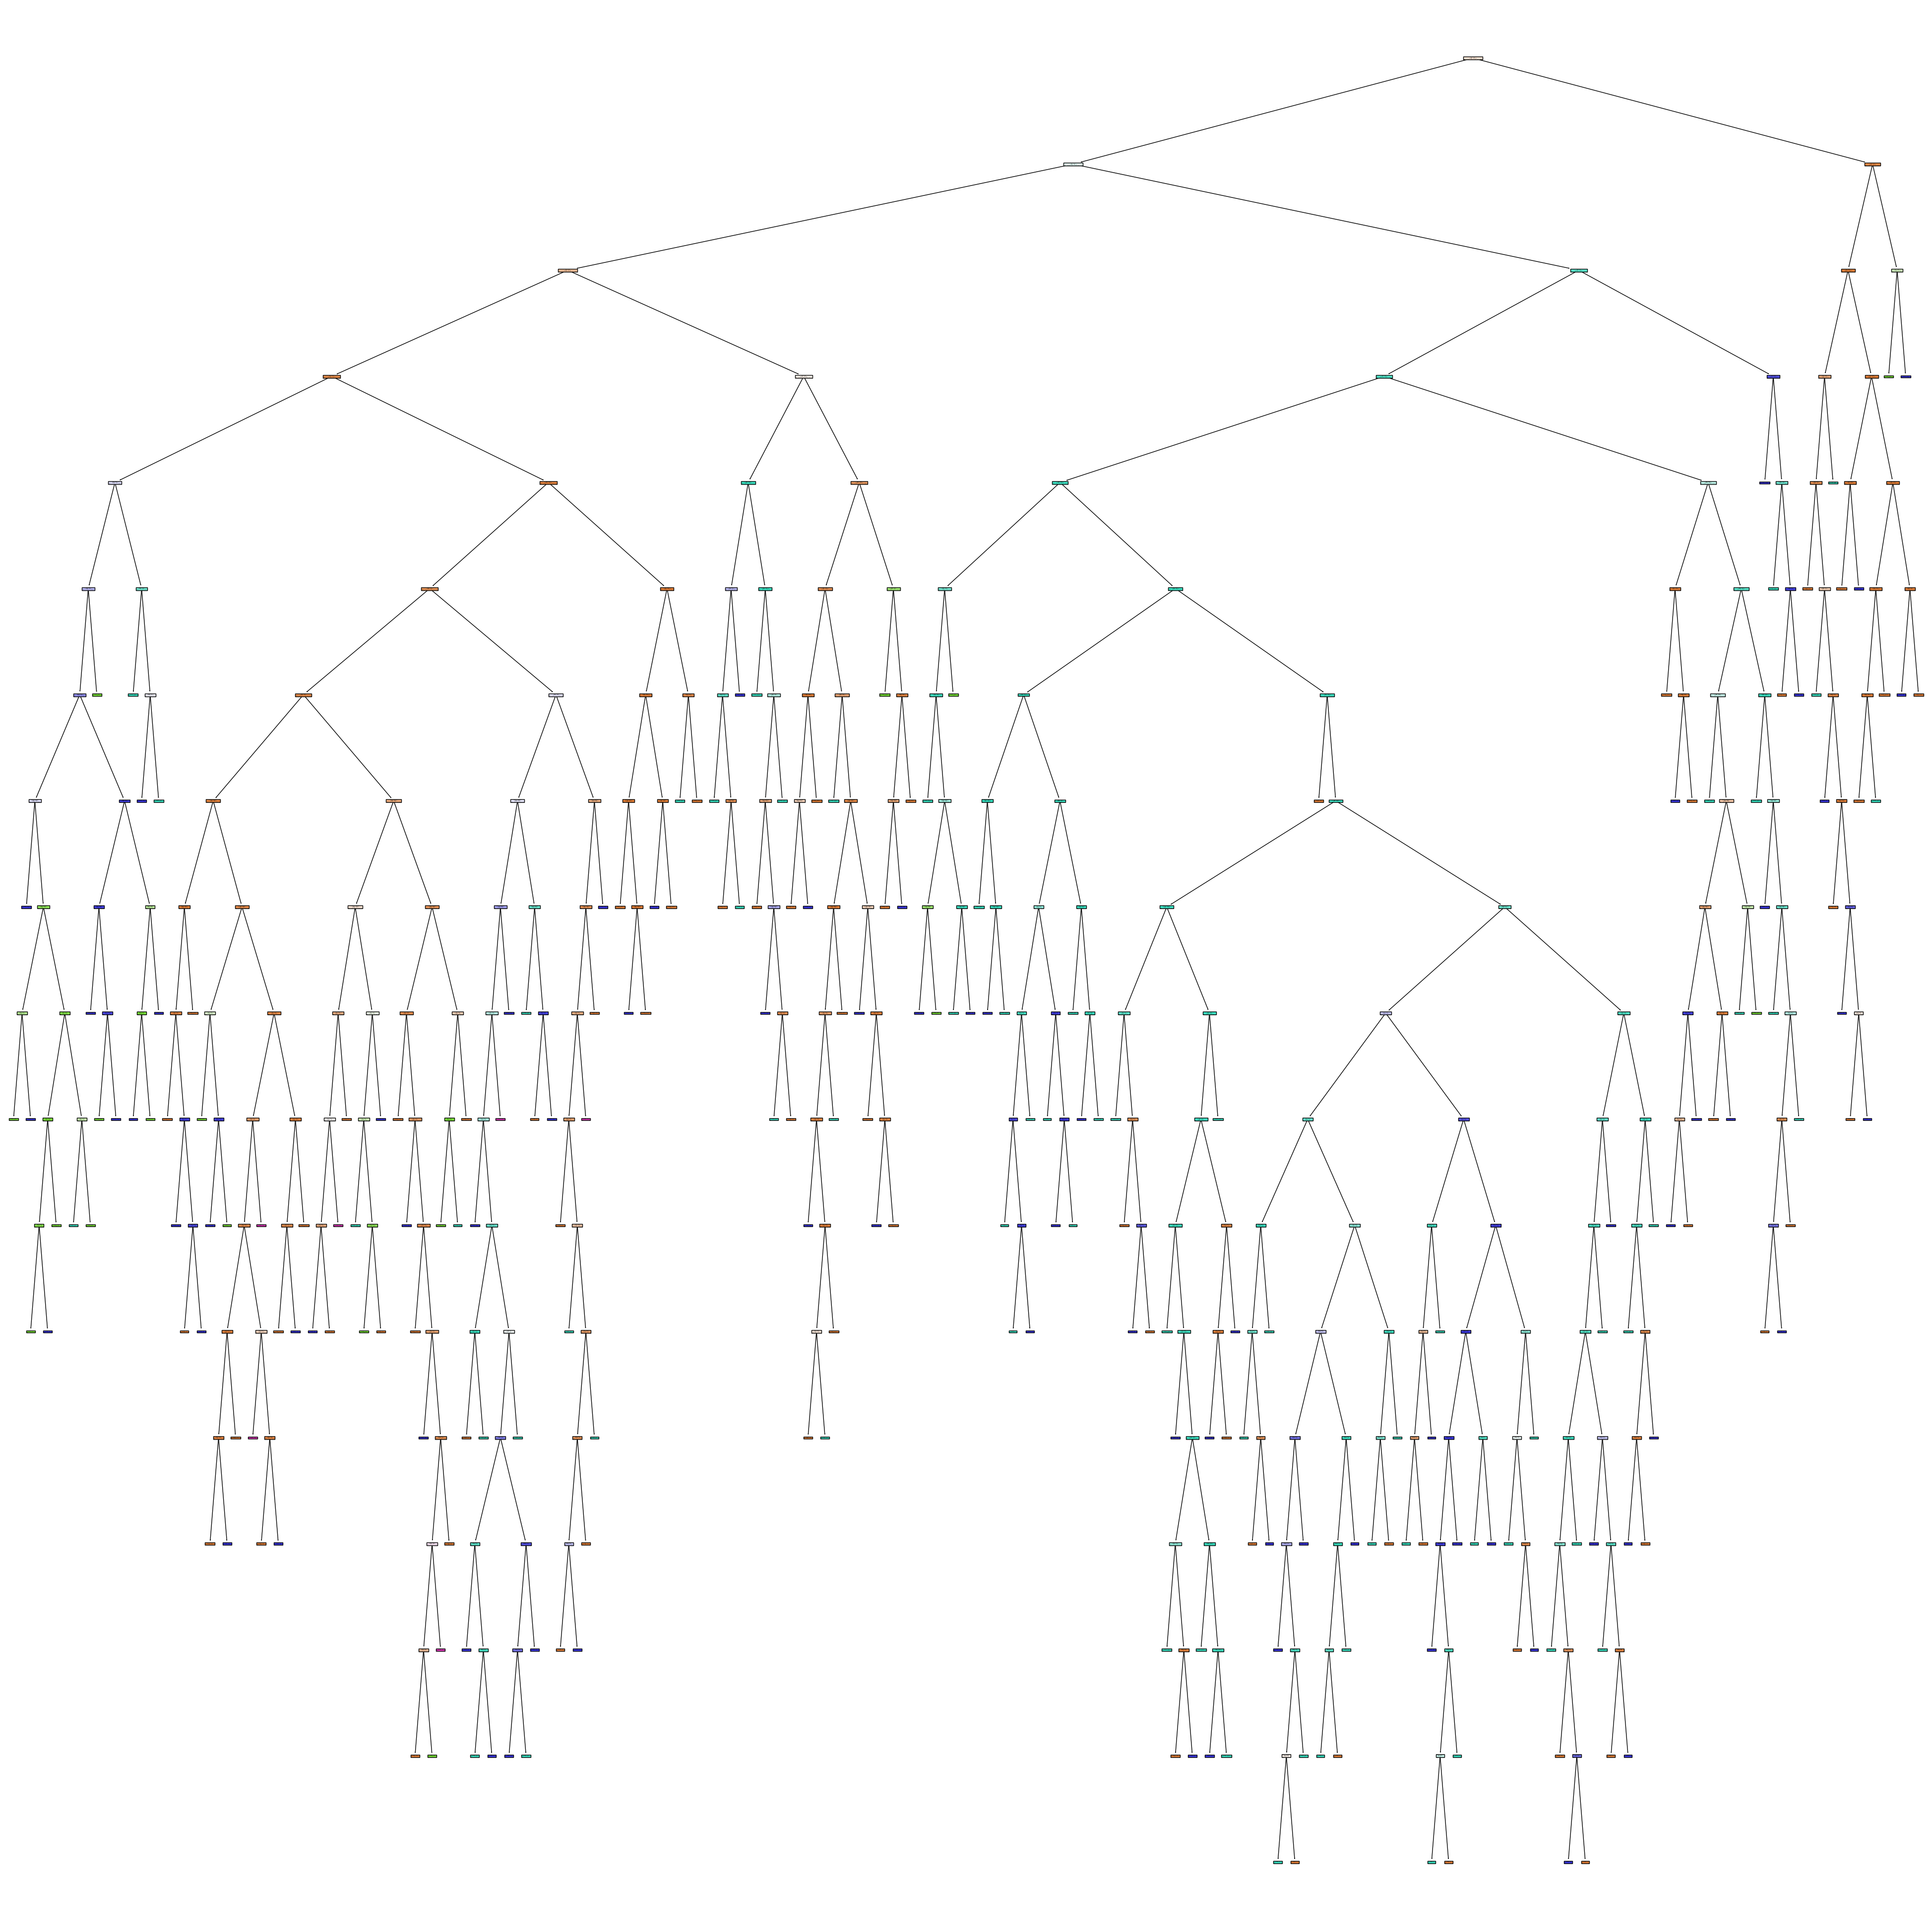

In [56]:
fig = plt.figure(figsize=(50,50))
_ = tree.plot_tree(decisionTreeClassifier_model, feature_names=["Act", "Section", "Type", "Disposition", "Purpose"],  filled=True)
fig.savefig('decisionTree.png')

In [61]:
# Accuracy comes out to be 100% and the decision tree is very extensive, because the dataset used is very large. 
#At the time of training, decision tree gained the knowledge about that data, 
# and now if you give same data to predict it will give exactly same value. 
# That's why decision tree producing correct results every time